### 1. 경사하강법 수동 구현

In [ ]:
import numpy as np
np.random.seed(42)
X = np.linspace(-np.pi,np.pi,100)        # linspace -> -1~1사이의 수를 균등하게 15개 만들어라
y = np.sin(X) #+ np.random.randn(100)        # 노이즈 추가
# np.sin(X) X의 값에 사인 그래프 형태를 띄는 값들과
# np.random.randn(100)  0과 1 사이의 난수를 100개 생성. 이는 표준정규분포를 띄는 값
# 사인 형태의 그래프를 띄는 랜덤한 숫자들이 y의 값으로 더해짐


In [ ]:
# 가중치 초기값
a,b,c,d = 0., 0., 0., 0.  # 정수보다 실수로 만드는 것이 계산을 더 정확하게 함
eta = 1e-3               # learning rate
epochs = 1000

In [ ]:
# 학습과정 기록   손실값, 파라메터의 값
mse_history = np.zeros(epochs)     # p.zeros(epochs)-> epochs의 개수만큼 0으로 채워진 1차원 배열을 만든다
parameter_history = np.zeros((epochs,4))        # epochs개의 행(row)과 4개의 열(column)을 가지는 2차원 배열(행렬)의 크기를 지정/ 4는 a,b,c,d 학습을 통해 찾아야할 파라미터

# 두개 모두 손실값을 기록하지만
# mse_history는 모델의 예측값과 실제 정답(Target) 값의 차이를 제곱하여 평균 낸 값
# parameter_history는 abcd 4개의 각 파라미터(가중치) 값 자체를 기록

모델의 출력(예측) y_hat = ax**3 + bx**2  + cx + d   
오차e = y - y_hat                                   # y는 실제 데이터(정답자)를 뜻함/ 즉 실제값-예측값을 빼줘서 차이를 오차로 받는다  
손실함수 mse    
mp.mean(e^2)                                        # 평균제곱오차(mse)공식임 : 오차 제곱의 평균  
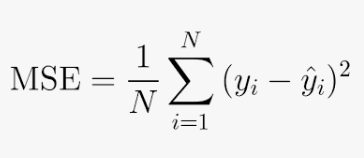

- 기울기 DL/Dseta(seta - a,b,c,d, 중에 하나) 손실L이 y_hat을 통해 seta에 의존 연쇄법칙이 가능  
-> 기울기를 계산해서, 손실(L)이 가장 가파르게 줄어드는 방향으로 파라미터를 업데이트를 하는 것  
-> 손실(L)은 y_hat을 거쳐서 파라미터(seta)에 간접적으로 의존하는 연결고리가 만들어짐  
-> 즉 공식을 통해 직접 연결되어 있지 않은 손실과 파라미터 사이의 기울기를 구할 수 있게 됨  
  

- 편미분 a로 편미분 x**3  
- 편미분 b로 편미분 x**2  
- 편미분 c로 편미분 x  
- 편미분 d로 편미분 1  
 

- 기울기 a 2(y-y_hat)x**3  
- 기울기 b 2(y-y_hat)x**2  
- 기울기 c 2(y-y_hat)x  
- 기울기 d 2(y-y_hat)*1  
-> 모두 2를 곱해주기 때문에 계산할 떄는 2를 빼주기도 함  


In [ ]:
for epoch in range(epochs):
    y_hat = a*X**3 + b*X**2  + c*X + d 
    e = y - y_hat

    # mse
    mse = np.mean(e**2)
    mse_history[epoch] = mse        # mse_history[epoch] -> epoch가 들어간 이유는 회차별로 mse를 각각 기록
    
    # gradients
    da = np.mean(-e*X**3)
    db = np.mean(-e*X**2)
    dc = np.mean(-e*X)
    dd = np.mean(-e)

    # updata
    a -= eta*2*da     # -= 를 하는 이유는 구해진 기울기를 마이너스 하는 것
    b -= eta*2*db     # 기울기에 -를 해 손실을 감소시킨다는 것. 손실을 줄이려면 기울기가 가리키는 방향과 반대로 가야함
    c -= eta*2*dc
    d -= eta*2*dd
    parameter_history[epoch] = [a,b,c,d]    # 기존 파라미터에서 (학습률 * 기울기) 값을 뺀 새로운 파라미터 값

# 최종결과

print(a,b,c,d,mse)


In [ ]:

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')             # 실제값
plt.plot(X,y_hat, label='y_hat')    # 예측값
plt.legend()
plt.show()

---
### 2. 텐서로 변경 - 자동미분
-> 기울기 계산과 파라미터 업데이트가 자동화됨

In [ ]:
# 텐서로 변경  - 자동미분
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

# 학습시킬 변수를 ab,c,d 텐서로 생성
a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )
for epoch in range(epochs):
    # forward 즉 모델
    y_hat = a*X**3 + b*X**2 + c*X + d
    # 오차
    mse = torch.mean( (y - y_hat)**2  )
    mse.backward()                      # a,b,c,d 기울기 자동측정/ 기울기를 직접 계산했던 수동 버전과 가장 큰 차이점
    mse_history[epoch] = mse.item()
    # 역전파 - 수동
    with torch.no_grad():  # 메모리측면에서 기록을 안한다/ 딥러닝 프레임워크를 사용할 때 필수적으로 추가되는 관리 작업
        a -= eta*2*a.grad
        b -= eta*2*b.grad
        c -= eta*2*c.grad
        d -= eta*2*d.grad
        # 그래이언트 초기화
        a.grad.zero_(); b.grad.zero_(); c.grad.zero_(); d.grad.zero_()      # 다음 에포크의 backward가 호출될떄 현재 기울기 값이 더해지지 않도록 이번 에포크에서 사용한 기울기를 모두 0으로 만든다/ 딥러닝 프레임워크를 사용할 때 필수적으로 추가되는 관리 작업
    parameter_history[epoch] = [a.item(),b.item(),c.item(),d.item()]    #  학습이 진행되면서 파라미터(a, b, c, d) 값들이 매 에포크(epoch)마다 어떻게 변하는지 기록하기 위한 과정

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')             # 실제값
plt.plot(X,y_hat.detach().numpy(), label='y_hat')    # 예측값
plt.legend()
plt.show()
    

--- 
### 옵티마이저 사용
-> 계산된 기울기를 가지고 파라미터를 어떻게 업데이트할지 결정하는 규칙
-> 어떻게 업데이트 할 것인가의 복잡한 로직을 옵티마이저 객체 안에 캡슐화
-> optimizer.step()이라는 명령만 내리면, 옵티마이저가 알아서 정해진 규칙에 따라 모든 파라미터를 업데이트


In [ ]:
from torch.optim import Adam
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

mse_history = np.zeros(epochs)
parameter_history = np.zeros( (epochs, 4) )

optim = Adam([a,b,c,d], lr = eta) 
for epoch in range(epochs):
    optim.zero_grad()

    y_hat = a*X**3 + b*X**2 + c*X + d

    e = y-y_hat
    mse = torch.mean(e**2)
    mse.backward()
    optim.step()        # 옵티마이저에 등록된 모든 파라미터(가중치)를 한번 업데이트 하는 기능

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')             # 실제값
plt.plot(X,y_hat.detach().numpy(), label='y_hat')    # 예측값
plt.legend()
plt.show()
    

---
### 3. 벡터화
-> a,b,c,d 의 개별적인 숫자(스칼라) 대신 하나의 벡터와 행렬을 연산으로 한번에 처리

In [ ]:
# Xtheta = [X^3, X^2, X, 1]


In [ ]:
torch.stack([X**3, X**2, X, torch.ones_like(X)],dim=1)        # torch.ones_like(X) -> 원래는 1이지만 같은 텐서형태로 만들어주기 위해서
# stack은 값을 쌓아주는 것

In [ ]:
X.size()

In [ ]:
from torch.optim import Adam
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

eta = 1e-3
epochs = 1000

# 기저함수 행렬(100,4)
X_theta = torch.stack([X**3, X**2, X, torch.ones_like(X)],dim=1)  # y_hat 식을 X_theta으로 선언하여서 학습/ stack은 값을 쌓는것/ dim=1 세로형태로 쌓기 위해서. dim은 차원을 뜻함
# 가중치 벡터
w = torch.zeros(4, requires_grad= True)        # a,b,c,d의 개별 파라미터를 w로 묶음. w라는 벡터 하나만 학습시키면 됨


optim = Adam([w], lr = eta) 
for epoch in range(epochs):
    optim.zero_grad()
    # 행렬-벡터 곱을 통해 100개의 예측값을 한 번에 계산하는 과정
    y_hat = X_theta@w   # (100,4) $ (4,) = (100,)   # @는 PyTorch와 NumPy에서 행렬 곱을 수행하는 연산자

    e = y-y_hat
    mse = torch.mean(e**2)
    
    mse.backward()
    optim.step()        # 옵티마이저에 등록된 모든 파라미터(가중치)를 한번 업데이트 하는 기능

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')             # 실제값
plt.plot(X,y_hat.detach().numpy(), label='y_hat')    # 예측값
plt.legend()
plt.show()
    

---
##### 4. 손실함수 (nn.MSELoss) 모듈사용

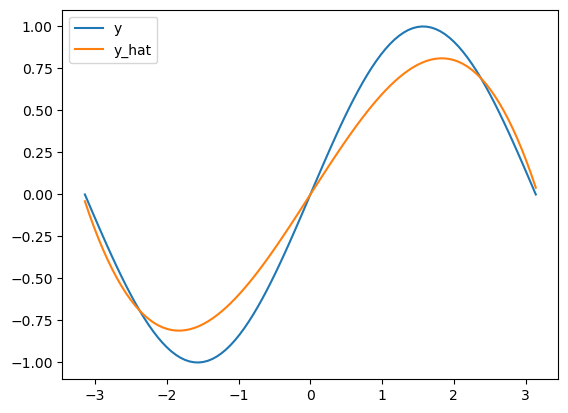

In [ ]:
from torch.optim import Adam
import torch
import torch.nn as nn
import numpy as np
torch.manual_seed(42)
np.random.seed(42)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

# 하이퍼파라메터
eta = 1e-3
epochs = 1000
# 기저함수 행렬(100,4)
X_theta = torch.stack([X**3, X**2, X, torch.ones_like(X)],dim=1)    # dim=1 세로형태로 쌓기 위해서
# 가중치 벡터 초기화
w = torch.zeros(4, requires_grad= True)
# 가중치 적용
optim = Adam([w], lr = eta) 
# 손실함수
criterion = nn.MSELoss()


for epoch in range(epochs):
    optim.zero_grad()

    y_hat = X_theta@w   # (100,4) $ (4,) = (100,)

    loss= criterion(y_hat,y)
    loss.backward()
    optim.step()        # 옵티마이저에 등록된 모든 파라미터(가중치)를 한번 업데이트 하는 기능

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')             # 실제값
plt.plot(X,y_hat.detach().numpy(), label='y_hat')    # 예측값
plt.legend()
plt.show()
    

---
##### 5. 가중치 부여하지 않을 때

In [ ]:
# x 텐서이고 100,4 형태로 제공
# 각 차수에 대응하는 가중치를 정해서 --> 토치의 모델을 사용하며 가중치는 우리가 정하지 않고 계산된다
# 내적연산을 해서 예측하고 
# 예측에 대한 오차를 구해서 - 손실함수
# 손실함수의 값을 최소화할수 있는 기울기를 계산
# 업데이트해서 다음 계산에 업데이트된 가중치를 사용 - 이과정을 epochs 만큼 반복

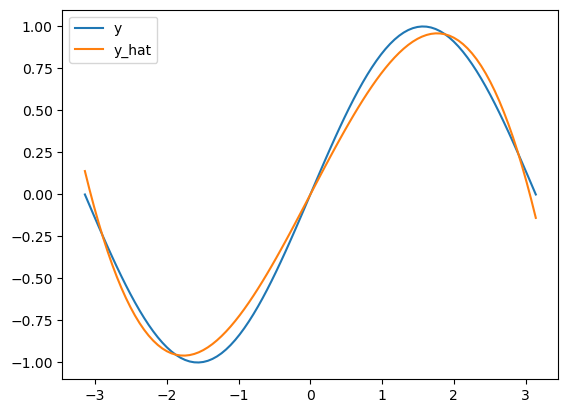

In [ ]:
from torch.optim import Adam
import torch
import torch.nn as nn
import numpy as np
torch.manual_seed(42)
np.random.seed(42)
import torch.nn as nn

model = nn.Linear(4,1, bias=False)

X = torch.linspace(-np.pi, np.pi, 100)
y = torch.sin(X)

a = torch.tensor(0. , requires_grad=True)
b = torch.tensor(0. , requires_grad=True)
c = torch.tensor(0. , requires_grad=True)
d = torch.tensor(0. , requires_grad=True)

# 하이퍼파라메터
eta = 1e-3
epochs = 2000
# 기저함수 행렬(100,4)
X_theta = torch.stack([X**3, X**2, X, torch.ones_like(X)],dim=1)  
# 가중치 적용
optim = Adam(model.parameters(), lr = eta) 
# 손실함수
criterion = nn.MSELoss()


for epoch in range(epochs):
    optim.zero_grad()

    y_hat = model(X_theta).squeeze()   # (100,4) $ (4,) = (100,)
    loss= criterion(y_hat,y)
    loss.backward()
    optim.step()        # 옵티마이저에 등록된 모든 파라미터(가중치)를 한번 업데이트 하는 기능

import matplotlib.pyplot as plt
plt.plot(X,y,label='y')             # 실제값
plt.plot(X,y_hat.detach().numpy(), label='y_hat')    # 예측값
plt.legend()
plt.show()
    